# Machine Learning Housing Corp 

This is an End to End project to practice concepts of Machine Learning over the Californina Housing Proect.
The format followed is in sync with the Chapter 2 of Hands on Machine Learning with Scikt-Learn & TensorFlow. This is a practice hands-on proect

## Setup

Setting up project directory and output paths, for data and model.

In [229]:
#Common imports
import numpy as np
import os
import sys

#To make outputs more consistent
np.random.seed(42)

#To plot figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as pt

pt.rcParams['axes.labelsize'] = 14
pt.rcParams['xtick.labelsize'] = 12
pt.rcParams['ytick.labelsize'] = 12

#Folder Directory Structure
PROJECT_ROOT_DIR ='.'
PROJECT_FOLDER = 'california_housing'
PROJECT_ID='end_to_end_project_california_housing'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR,'model',PROJECT_ID)

def save_fig(fig_id,tight_layout=True,fig_extension='png',resolution=300):
    if not os.path.exists(IMAGES_PATH):
        os.makedirs(IMAGES_PATH)
    path = os.path.join(IMAGES_PATH,fig_id + '.' + fig_extension)
    print("Saving Figure : {}".format(fig_id))
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path,format=fig_extension,dpi=resolution)

### Step 1 : Download the Data

In [230]:
import tarfile
from six.moves import urllib

#Server Location
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("data", PROJECT_FOLDER)
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(url=HOUSING_URL,path=HOUSING_PATH):
    print('URL to Download : {}'.format(url))
    print('Path to Download : {} '.format(path))
    if not os.path.isdir(path):
        os.makedirs(path)
    tgz_path =  os.path.join(path,'housing.tgz')
    if not os.path.exists(tgz_path):
        print('Downloading data ...')
        urllib.request.urlretrieve(housing_url, tgz_path)
    print('Extracting data ...')
    housing_tgz =  tarfile.open(tgz_path)
    housing_tgz.extractall(path=HOUSING_PATH)
    housing_tgz.close()

#Downloading & Extract the data
fetch_housing_data()

URL to Download : https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz
Path to Download : data\california_housing 
Extracting data ...


### Step 2 : Load the Data

In [231]:
import pandas as pd

def load_data(path=HOUSING_PATH):
    data_file = os.path.join(path,'housing.csv')
    return pd.read_csv(data_file)

#Load data
print('Loading the Data...')
housing = load_data()
#Verift the data
housing.head(2)

Loading the Data...


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


### Step 3 : Prepare Train & Test Data

In [232]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

#The function inputs whether TO DO random splittin or Stratified Sampling.
#Incase of Stratified Sampling it, inputs the Feature

def create_train_test_split(data=housing,mode='Random',test_size=0.2,random_state=42,feature=None):
    
    if mode == 'Random':
        train_set,test_set = train_test_split(data,test_size=test_size,random_state=random_state)
    else:
        #The new category added reflects through out Data,Rand & Strat sets as it's an Object being passed
        new_feature = 'strat_'+feature
        data[new_feature] =  np.ceil(data[feature]/1.5)        
        #Labeling above 5 as 5
        data[new_feature].where(data[new_feature] < 5 , 5.0 , inplace=True)
        
        split = StratifiedShuffleSplit(n_splits=1,test_size=test_size,random_state=random_state)
        for train_index,test_index in split.split(data,data[new_feature]):
            train_set = data.loc[train_index]
            test_set = data.loc[test_index]
    
    return train_set,test_set

#Manually Doing Proportions to Compare later
def feature_category_porportions(data,feature):
    return data[feature].value_counts()/len(data)

In [240]:
rand_train_set,rand_test_set = create_train_test_split(housing)
strat_train_set,strat_test_set = create_train_test_split(housing,mode='Stratified',feature='median_income')
#housing['manual_median_income']= housing['median_income'].value_counts()/len(housing)

In [358]:
housing.info()
strat_train_set.info()
#housing['median_income'].value_counts()
#housing['strat_median_income'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.9+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 11 columns):
longitude              16512 non-null float64
latitude               16512 non-null float64
housing_median_age     16512 non-null float64
total_rooms            16512 non-null float64
total_bedrooms         16354 non-null float64
population             16512 non-null float64
households             16512 non-null float

In [242]:
#Comparing the Sets

compare_props =  pd.DataFrame({
    'Overall' : feature_category_porportions(housing,'strat_median_income'),
    'Stratified' : feature_category_porportions(strat_test_set,'strat_median_income'),
    'Random' : feature_category_porportions(rand_test_set,'strat_median_income')
    
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100


In [243]:
compare_props

,Overall,Random,Stratified,Rand. %error,Strat. %error
1.0,0.039826,0.040213,0.039729,0.973236,-0.243309
2.0,0.318847,0.324370,0.318798,1.732260,-0.015195
3.0,0.350581,0.358527,0.350533,2.266446,-0.013820
4.0,0.176308,0.167393,0.176357,-5.056334,0.027480
5.0,0.114438,0.109496,0.114583,-4.318374,0.127011


### Step 4 : Data Exploratory Analysis

In [244]:
#Check the first 2 data elements
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,strat_median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0


In [245]:
#Check all description of the columns for their Data-types, counts & Nulls
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
longitude              20640 non-null float64
latitude               20640 non-null float64
housing_median_age     20640 non-null float64
total_rooms            20640 non-null float64
total_bedrooms         20433 non-null float64
population             20640 non-null float64
households             20640 non-null float64
median_income          20640 non-null float64
median_house_value     20640 non-null float64
ocean_proximity        20640 non-null object
strat_median_income    20640 non-null float64
dtypes: float64(10), object(1)
memory usage: 1.7+ MB


In [246]:
#Since we see the ocean_proximity is an object let's explore it
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [247]:
#Let's see the distribution and attributes of the data
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,strat_median_income
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,3.006686
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,1.054618
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,2.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,3.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,4.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,5.000000


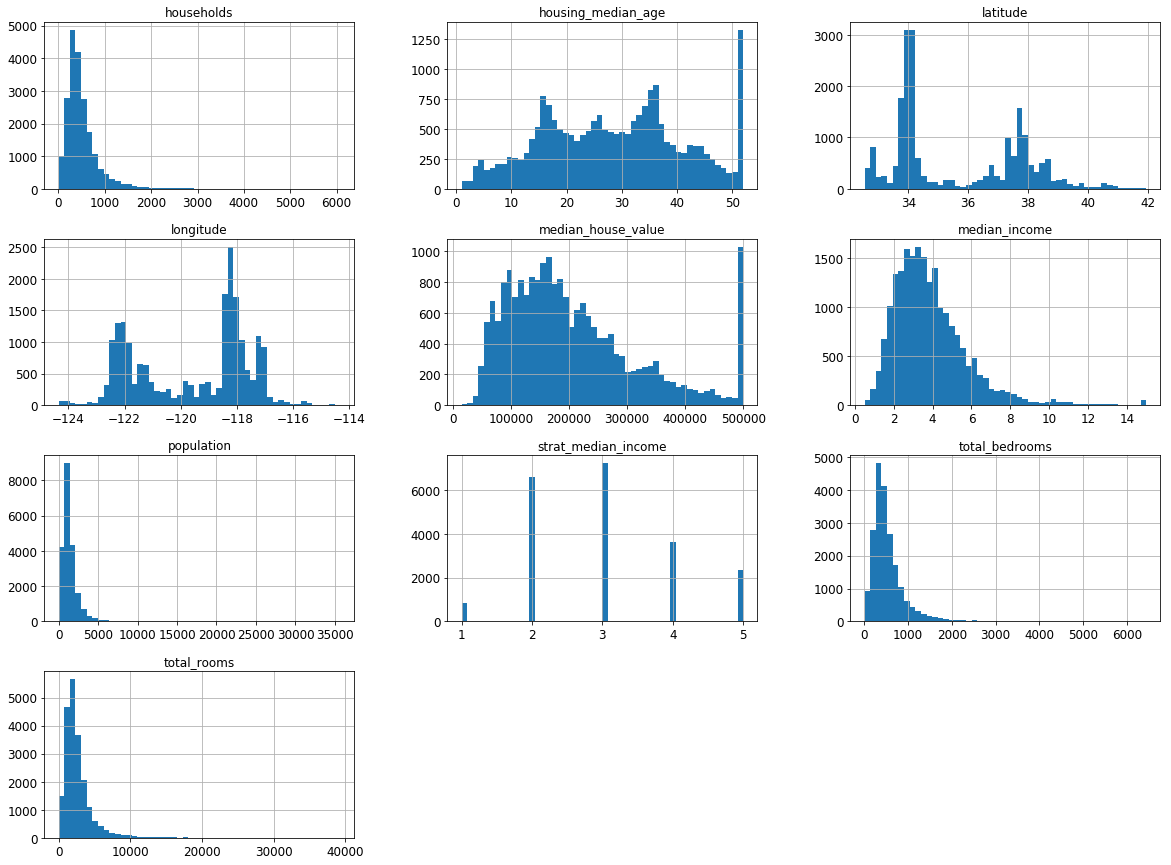

In [84]:
#We can see the graphical distribution too as follows 
import matplotlib.pyplot as plt
#Vertical Axis has number of instances
#Horizontal Axis has values of the attributes
housing.hist(bins=50,figsize=(20,15))
plt.show()

Saving Figure : geographical_distribution


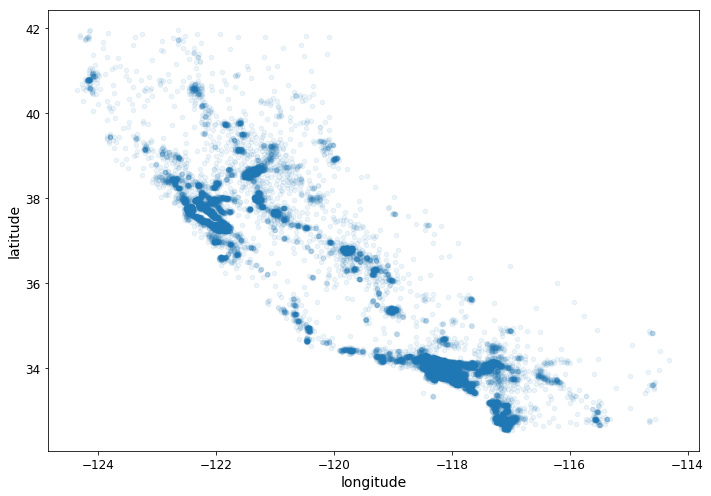

In [100]:
#Since this is geographical data ! 
#Let's plot it against Longitude & latittude

housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.08,figsize=(10,7))
save_fig('geographical_distribution')

Saving Figure : housing_prices_scatterplot


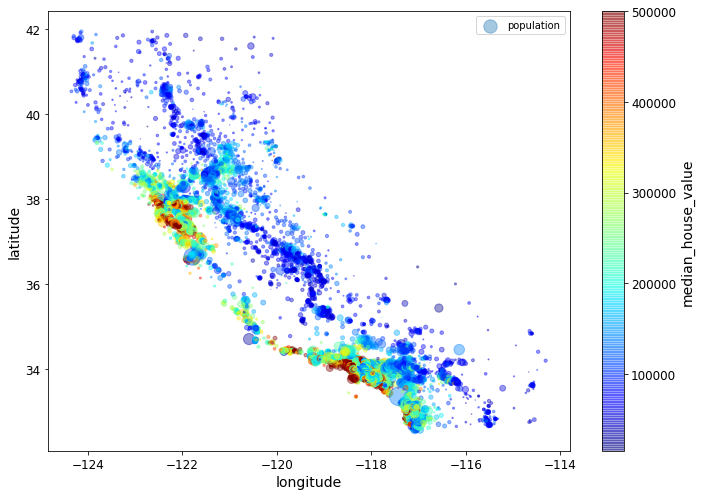

In [102]:
#Let's look at the housing prices

#We'll have circles to represent District's population : Option s
#Color represents housing prices : Option c 
#A predefined color map JET is used which ranges from blue(low values) to red{high values}

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

In [104]:
#We can use Correleation Matrix to find dependency of Features on one another. This can help us
#determine important and non-important features

def get_correlation(corr_matrix,data,feature):
    return corr_matrix[feature].sort_values(ascending=False)

corr_matrix = housing.corr()

In [106]:
get_correlation(corr_matrix,housing,'median_house_value')

median_house_value     1.000000
median_income          0.688075
strat_median_income    0.643892
total_rooms            0.134153
housing_median_age     0.105623
households             0.065843
total_bedrooms         0.049686
population            -0.024650
longitude             -0.045967
latitude              -0.144160
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CBCFD7CC0>,
      dtype=object)

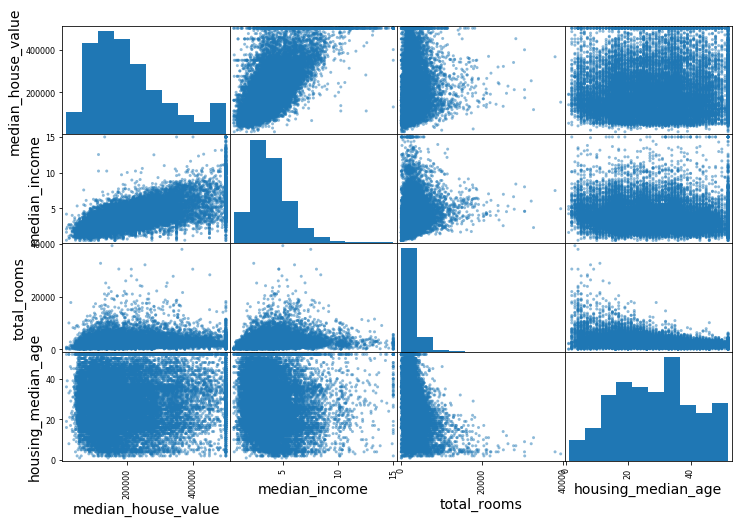

In [109]:
#We can also use scatter matrix plots
from pandas.plotting import scatter_matrix

#attributes = housing.columns
attributes = [ 'median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes],figsize=(12,8))

In [112]:
test_features_housing = housing.copy()
test_features_housing['rooms_per_household'] = test_features_housing['total_rooms']/housing['households']
test_features_housing['bedrooms_per_room'] = test_features_housing['total_bedrooms']/housing['total_rooms']
test_features_housing['population_per_household'] = test_features_housing['population']/housing['households']

corr_matrix = test_features_housing.corr()
get_correlation(corr_matrix,housing,'median_house_value')

median_house_value          1.000000
median_income               0.688075
strat_median_income         0.643892
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

### Step 5 : Data - Preprocessing 

Preparing our data for Machine Learning Algorithms

In [296]:

#Dropping the Label
housing = strat_train_set.drop(['median_house_value','strat_median_income'],axis=1)
housing_labels =  strat_train_set['median_house_value'].copy()
housing.info()
#housing_labels.info() - Series

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [290]:
#We had incomplete data in many fields which we need to handle

sample_incomplete_rows= housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [291]:
#Option 1 : Remove the null rows(districts)
sample_incomplete_rows.dropna(subset=['total_bedrooms'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [292]:
#Option 2 : Drop the feature
sample_incomplete_rows.drop('total_bedrooms',axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


In [297]:
#Option 3 : Extrapolate and fill the Null Values 
median = housing['total_bedrooms'].median()
sample_incomplete_rows['total_bedrooms'].fillna(median,inplace=True)

In [298]:
# Using Scikit Learn's inbuild package
housing.info()
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
#housing.columns
housing_num=housing.drop('ocean_proximity',axis=1)
#housing_num= housing.copy()
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
media

In [299]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [300]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [301]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

Transforming Training Set

In [328]:

X = imputer.transform(housing_num)
type(X)
#X.shape
#housing_tr = pd.DataFrame(X,columns=housing.drop(['strat_median_income','ocean_proximity'],axis=1).columns,index = list(housing.index.values)                         )
housing_tr = pd.DataFrame(X,columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


Pre-processing textual categories : Ocean Proximity

In [303]:
housing_cat = housing['ocean_proximity']
housing_cat.head(10)

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
8879      <1H OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

In [304]:
from sklearn.preprocessing import OneHotEncoder
def cat_textual_feature(data,feature='ocean_proximity'):
    #data_cat = data[feature]
    data_cat = data
    data_cat.head()
    data_cat_encoded,data_categories = data_cat.factorize()
    return data_cat_encoded,data_categories

def convert_one_hot_vector(data):
    encoder = OneHotEncoder()
    data_cat_1hot =  encoder.fit_transform(data.reshape(-1,1))
    return data_cat_1hot
    

In [305]:
#housing_cat
housing_cat_encoded,housing_categories =  cat_textual_feature(housing_cat)
housing_cat_1hot =  convert_one_hot_vector(housing_cat_encoded)

In [306]:
housing_cat_encoded,housing_categories

(array([0, 0, 1, ..., 2, 0, 3], dtype=int64),
 Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object'))

In [307]:
#One hot vector gives a Sparse Matrix
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [308]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [340]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, do not try to understand it (yet).

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

The CategoricalEncoder expects a 2D array containing one or more categorical input features. We need to reshape housing_cat to a 2D array:
A better solution is to use Scikit-Learn's upcoming CategoricalEncoder class: it will soon be added to Scikit-Learn, and in the meantime you can use the code below (copied from Pull Request #9151).

In [342]:
#We can convert directly into One-hot vector either Sparse/Dense

#from sklearn.preprocessing import CategoricalEncoder # in future versions of Scikit-Learn

cat_encoder = CategoricalEncoder()
housing_cat_reshaped = housing_cat.values.reshape(-1, 1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [281]:
data.info()

NameError: name 'data' is not defined

#### Making a Single Pipeline of Transformers for all the above

##### 1. Adding Extra Attributes

In [309]:
#housing_tr.info()
#housing.info()
#housing_num.info()

In [347]:
from sklearn.base import BaseEstimator,TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAtrributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
type(housing_extra_attribs)

numpy.ndarray

In [348]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


##### 2. Pipeline to pre-process Numerical Attributes

In [351]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing  import StandardScaler

num_pipeline = Pipeline([
    ('imputer',Imputer(strategy='median')),
   # ('attribs_adder',CombinedAtrributesAdder()),
    ('std_scaler',StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [333]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.63621141,
        -0.42069842, -0.61493744],
       [-1.17602483,  0.6596948 , -1.1653172 , ..., -0.99833135,
        -1.02222705,  1.33645936],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.43363936,
        -0.0933178 , -0.5320456 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.60790363,
         0.71315642, -0.3167053 ],
       [ 0.78221312, -0.85106801,  0.18664186, ..., -0.05717804,
        -0.37545069,  0.09812139],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.13515931,
         0.3777909 , -0.15779865]])

A transformer to just select a subset of the Pandas DataFrame columns:

In [335]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

Joining the components into a big pipeline that will preprocess both the numerical and the categorical features

In [343]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        #('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
    ])

In [344]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [345]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [346]:
housing_prepared.shape

(16512, 13)

### Step 6 : Select & Training Models

In [360]:
# stochastic gradient descent (SGD) learning
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [364]:
# let's try the full pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
#Compare against the actual values:
print("Labels:", list(some_labels))

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

Predictions: [212480. 321984. 210624.  61184. 192640.]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


69054.61330450699

In [371]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse =  mean_squared_error(housing_labels,housing_predictions)
tree_rmse =  np.sqrt(tree_mse)
tree_rmse

0.0

In [374]:
from sklearn.ensemble import RandomForestRegressor

forest_reg =  RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)
housing_predictions =  forest_reg.predict(housing_prepared)
forest_mse =  mean_squared_error(housing_labels,housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

21837.13660116617

In [375]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111803.81648688269

### Step 7 : Evaluation

In [368]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,housing_prepared,housing_labels,
                        scoring =  'neg_mean_squared_error',cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [369]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [67567.24492023 65278.13462292 72506.87431753 69668.08984131
 68706.60589466 73939.02116801 68123.20490787 70175.12497166
 70086.88365251 68761.72877461]
Mean: 69481.29130713161
Standard deviation: 2328.1098573339323


In [370]:
scores = cross_val_score(lin_reg,housing_prepared,housing_labels,
                        scoring =  'neg_mean_squared_error',cv=10)
lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)

Scores: [67446.07696594 67397.54024976 68511.23989586 74633.41230858
 68314.56738182 71688.76516417 65361.14176205 68571.62738037
 72467.75522192 68098.06828865]
Mean: 69249.01946191181
Standard deviation: 2651.406103389875


In [373]:
scores = cross_val_score(forest_reg,housing_prepared,housing_labels,
                        scoring =  'neg_mean_squared_error',cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [49044.4061262  48713.70201666 51384.52288139 53361.47905747
 51426.72929713 54851.05718015 49685.88908464 52076.51281512
 54436.200275   50509.1194729 ]
Mean: 51548.96182066646
Standard deviation: 2042.2854576715872


### Fine Tune Model

###### 1. Grid Search

In [376]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [377]:
#Best Parameter Found -
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [378]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [379]:
#Evaluation Scores
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

65025.90057785315 {'max_features': 2, 'n_estimators': 3}
55567.469054287765 {'max_features': 2, 'n_estimators': 10}
52745.62999829217 {'max_features': 2, 'n_estimators': 30}
60484.10994549839 {'max_features': 4, 'n_estimators': 3}
53064.21922552561 {'max_features': 4, 'n_estimators': 10}
50659.742907315805 {'max_features': 4, 'n_estimators': 30}
57989.240644906095 {'max_features': 6, 'n_estimators': 3}
52038.5613596136 {'max_features': 6, 'n_estimators': 10}
50028.81252081913 {'max_features': 6, 'n_estimators': 30}
58290.89174457018 {'max_features': 8, 'n_estimators': 3}
52077.367694126304 {'max_features': 8, 'n_estimators': 10}
50165.87997371636 {'max_features': 8, 'n_estimators': 30}
62753.68173709869 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54079.935329532156 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60634.617561849955 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53763.001257702024 {'bootstrap': False, 'max_features': 3, 'n_estimator

In [380]:
pd.DataFrame(grid_search.cv_results_)

c:\users\amita\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\amita\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\amita\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.wa

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_bootstrap,param_max_features,param_n_estimators,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.068088,0.003726,-4.228368e+09,-1.135830e+09,NaN,2,3,"{'max_features': 2, 'n_estimators': 3}",18,-4.164652e+09,...,-4.156887e+09,-1.113369e+09,-4.101508e+09,-1.107221e+09,-4.307211e+09,-1.109691e+09,0.002888,6.063455e-03,1.140493e+08,3.968671e+07
1,0.197412,0.009306,-3.087744e+09,-5.723866e+08,NaN,2,10,"{'max_features': 2, 'n_estimators': 10}",11,-2.947663e+09,...,-3.181076e+09,-5.655734e+08,-2.922304e+09,-5.602476e+08,-3.157715e+09,-5.705913e+08,0.001805,2.457503e-04,1.271436e+08,1.343191e+07
2,0.588706,0.025716,-2.782101e+09,-4.310471e+08,NaN,2,30,"{'max_features': 2, 'n_estimators': 30}",6,-2.620420e+09,...,-2.902239e+09,-4.255777e+08,-2.659312e+09,-4.320848e+08,-2.907140e+09,-4.316585e+08,0.003426,4.001299e-04,1.206914e+08,5.819183e+06
3,0.095265,0.003101,-3.658328e+09,-9.629473e+08,NaN,4,3,"{'max_features': 4, 'n_estimators': 3}",15,-3.435109e+09,...,-3.722327e+09,-9.502125e+08,-3.476167e+09,-9.212267e+08,-4.078559e+09,-1.008491e+09,0.001030,1.964112e-04,2.323304e+08,2.972041e+07
4,0.308705,0.009006,-2.815811e+09,-5.173846e+08,NaN,4,10,"{'max_features': 4, 'n_estimators': 10}",8,-2.563779e+09,...,-2.932857e+09,-5.099246e+08,-2.716802e+09,-5.264072e+08,-3.056606e+09,-5.281742e+08,0.002511,1.087356e-06,1.703242e+08,9.628138e+06
5,0.899008,0.026118,-2.566410e+09,-3.938756e+08,NaN,4,30,"{'max_features': 4, 'n_estimators': 30}",3,-2.338022e+09,...,-2.711271e+09,-3.925360e+08,-2.452471e+09,-3.944388e+08,-2.748235e+09,-3.980994e+08,0.002962,8.602758e-04,1.545549e+08,4.632008e+06
6,0.124883,0.003303,-3.362752e+09,-9.086701e+08,NaN,6,3,"{'max_features': 6, 'n_estimators': 3}",12,-2.988097e+09,...,-3.468423e+09,-9.152375e+08,-3.478687e+09,-9.569367e+08,-3.547878e+09,-8.786514e+08,0.001289,2.448194e-04,2.001424e+08,2.682298e+07
7,0.410054,0.009106,-2.708012e+09,-4.929489e+08,NaN,6,10,"{'max_features': 6, 'n_estimators': 10}",4,-2.456180e+09,...,-2.817553e+09,-4.879766e+08,-2.731240e+09,-4.970146e+08,-2.835645e+09,-4.964497e+08,0.001720,2.001526e-04,1.358887e+08,3.701998e+06
8,1.223947,0.026617,-2.502882e+09,-3.827274e+08,NaN,6,30,"{'max_features': 6, 'n_estimators': 30}",1,-2.291186e+09,...,-2.580657e+09,-3.725893e+08,-2.458344e+09,-3.830276e+08,-2.636222e+09,-3.861947e+08,0.005110,5.839304e-04,1.205596e+08,6.457548e+06
9,0.154874,0.003203,-3.397828e+09,-8.897190e+08,NaN,8,3,"{'max_features': 8, 'n_estimators': 3}",13,-3.165291e+09,...,-3.555601e+09,-8.780099e+08,-3.306737e+09,-8.748992e+08,-3.565184e+09,-9.153696e+08,0.002977,2.453988e-04,1.518396e+08,1.426372e+07


###### 2. Randomized Search

In [381]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020CC5E0D128>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020CC5E0DD30>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [382]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49464.739864280265 {'max_features': 7, 'n_estimators': 180}
51676.218604666334 {'max_features': 5, 'n_estimators': 15}
50838.13741885453 {'max_features': 3, 'n_estimators': 72}
51123.314698721675 {'max_features': 5, 'n_estimators': 21}
49582.017784966105 {'max_features': 7, 'n_estimators': 122}
50846.18539070851 {'max_features': 3, 'n_estimators': 75}
50755.5533224985 {'max_features': 3, 'n_estimators': 88}
49791.748134220805 {'max_features': 5, 'n_estimators': 100}
50583.10543643203 {'max_features': 3, 'n_estimators': 150}
65164.53481664564 {'max_features': 5, 'n_estimators': 2}


In [385]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [386]:
final_rmse

47375.251873934816